# Permutation test for correlation

In the previous examples we used permutation testing to assess the significance of a difference between groups (difference of means or mean difference).

Permutation testing can also be used to assess the statistical significance of a <i>correlation</i>.

As a reminder, a correlation can occur <i>only</i> in paired designs, as when two variables are correlated, it means that an individual's score on one variable is related to their score on the other variable. 

Correlations can be interesting in themselves (do students who score highly on English tests also score highly on maths tests?; do people who eat more broccli have greater bone density?). 

They can also reflect the fact that experimental measures often depend on factors other than the one we are manipulating (sometimes called <i>confounding factors</i>), which are what we try to control for by using a paired design. For example if we are interested in whether men earn more than women, we might use a paired design comparing brothers and sisters to take into account the very important effects of parental occupation and education on earnings which mean that high-earning brothers often have high-earning sisters. The fact that brothers' and sisters' earnings are correlated actually reflects the confounds that we want to 'cancel out' by using a paired design to test gender differences.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Toy example

[A toy example is an example with a very small dataset, just to show how it works]

We are interested in whether people who eat more broccoli have higher IQs.

#### Question & design

We hypothesise that those wo eat more broccoli ave higher IQs 

This is tecnically a *repeated measures design* as we have two measurements (broccoli consumption and IQ) for each individual. 

#### Hypotheses

We can state our hypotheses as follows:

$\mathcal{H_o}:$ There is no relationsip between broccoli consumption and IQ
* the correlation, Pearson's $r=0$

$\mathcal{H_a}:$ Those with higher broccoli consumption have higher IQ
* the correlation, Pearson's $r>0$

This is a one-tailed (directional) alternative hypothesis

#### Data

The following made-up data give weekly broccoli consumption in grams and IQ for 25 individuals:

In [2]:
broccoli = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/broccoli.csv')
broccoli

,broccoli_g,IQ
0,0,87
1,28,91
2,0,101
3,20,92
4,0,96
5,92,95
6,88,92
7,128,94
8,0,96
9,22,99


Let's plot the data:

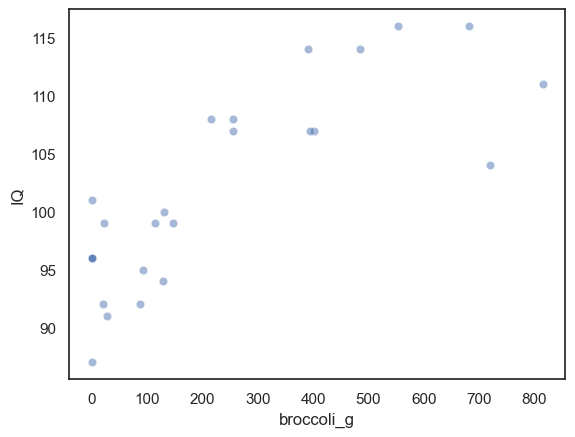

In [3]:
sns.scatterplot(data=broccoli, x='broccoli_g', y='IQ', alpha=0.5)
plt.show()

We can see that there does seem to be a correlation. 

### Test statistic

Here our test statistic is Pearson's $r$

In [4]:
broccoli.broccoli_g.corr(broccoli.IQ)

0.8011532312132079

The correlation is 0.80, which is actually very strong (remember they are made-up data!).

### Is this result statistically significant? 

That is, would the result (a correlation of 0.80) be very unlikely to occur due to chance, if the null hypothesis were true? 

Even if there was no relationship between broccoli consumption and IQ, it would sometimes happen that for 25 random people the ones with the highest IQ tend to also be the biggest broccoli-eaters, resulting in a positive correlation. The question is how often a positive correlation as large as $r$=0.80 would occur just due to chance if broccoli consuption and IQ were paired randomly.


### Permutation

The sample tells us several interesting things about broccoli consumption and IQ, regardless of whether broccoli consummption and IQ are related:

**Independent features of Broccoli distribution (to be retained):**

* Most people eat between 0 and 500g of broccoli a week
* Quite a few people eat 0g of broccoli (they never eat broccoli, basically)

It also tells us about some potential effects to do with the relationship between IQ and broccoli:

**Possible correlation effects (to be shuffled out)
* the quantity of broccoli eaten seems to be higher for individuals with higher IQ
* none of the highest IQ people are the 0g of broccoli people


### Visualizing random shuffles in correlation 

What we are going to do is shuffle the data around to create many new (re)samples preserving distribution within each variable (broccoli consumption and IQ - so for example there will always be 5 non-broccoli-eaters) but **pairing the datapoints** at random so one person's IQ is matched with another person's broccoli consumption. 

Using these simulated (shuffled) datasets we will work out how often we get a correlation of 0.80 or more. This is equivalent to determining how likely our correlation is to have occurred due to chance.



Below you see jointplots for the original data and three random permutations (joint plots are scatter plots with histograms of the distributions of x and y at the sides, created using the function `sns.jointplot()`)


Notice that in the shuffled data, when each person's broccoli consupmtion is randomly paired with another person's IQ, the correlation goes away. However, the distribution of each variable by itself (the histograms in the margins) remain unchanged.

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk5_3PermutationsCorr.png" width="99%" />

You can see that the relationship between broccoli consumption and IQ looks less tight in the shuffled datasets.



## Run 10,000 shuffles

To get a fine-grained estimate of how likely it is to get a test statistic of r=0.8 due to chance, we run a *lot* of shuffles - say 10,000.

We can do this using a function from the library `scipy.stats`, called `scipy.stats.permutation_test()`

First of all we will run this (using the code block below) and learn about the output. Afterwards we will have a closer look at the Python syntax including defining a function.


In [5]:
def correlate(x, y):
    tmp = np.corrcoef(x,y)
    c = tmp[0][1] 
    return c

results = stats.permutation_test((broccoli.broccoli_g, broccoli.IQ), correlate, 
                                  permutation_type='pairings', alternative='greater', n_resamples=10000)
print(results)

PermutationTestResult(statistic=0.8011532312132079, pvalue=9.999000099990002e-05, null_distribution=array([ 0.09894673,  0.03248962,  0.38354369, ..., -0.32641418,
       -0.10148697, -0.02507507]))



The results are displayed below the code box; there are number of outputs from the test (contained in the parentheses)

* **statistic** - the test statistic (correlation) from our actual data, ie r=0.8
* **pValue** - the proportion of shuffles in which a result greater than 0.8 was obtained (due to chance) - note this is very small, $9.9 \times 10^{-5}$ or about 1/10000 
* **null distribution** - this contains all 10,000 correlation values, for the 10,000 shuffles

### The Null Distribution

The **null distribution** is the set of 10,000 values we get for the correlation, from our 10,000 shuffles (the equivalent of the red numbers on the 4-permutation example above)

Let's plot the null distribution in a histogram:

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


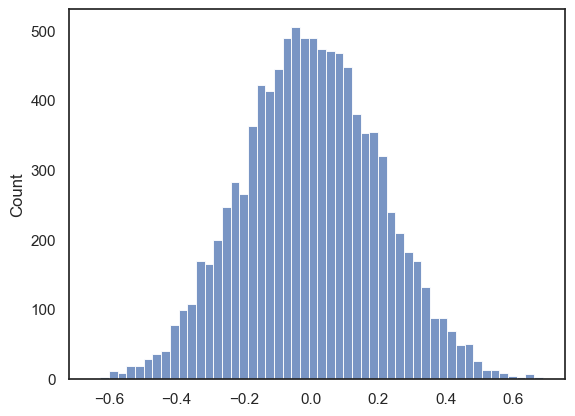

In [6]:
sns.histplot(results.null_distribution)
plt.show()

We can see that the null distribution is nice and symmetrical (the average correlation in shuffled data is zero, whilst positive and negative correlations are equally likely)

Note that our observed correlation, 0.8, is so rare that it was *never* obtained in the 10,000 shuffles

In [7]:
# check which values is the null distribution are greater than 4.6 and code as 1/0
# then use the numpy function np.mean() to get the avergae of those ones and zeros (ie he proportion of 1s)
np.mean(results.null_distribution >= 0.801)

0.0

### The $𝑝$-value¶

The probability that the test statistic (in this case, the correlation between broccoli consumption and IQ) would be observed if the null hypothesis were true, is sometimes called the $𝑝$-value.

Our permutation test shows that the $𝑝$-value associated with the observed difference of means is basically zero- we never get a correlation of 0.80 in our 10,000 random shuffles.

The result is considered statistically significant if $𝑝$ is smaller than some predetermined level, known as $\alpha$. Usually $\alpha=0.05$ or $\alpha=0.01$ is used, so the result is significant if $p=0.05$ or $p=0.01$. Our result would be considered highly statistically significant.

## Syntax of `stats.permutation_test()`

Let's have a look at the Python code to run the permutation test.


Firstly, we had to give the function `stats.permutation_test()` our two samples. In this case, the data are in 'wide form', ie the two measurements for each individual (broccoli consumption and IW) are contained in two different columns <tt>(broccoli.broccoli_g, broccoli.IQ)</tt>

Secondly, to tell `stats.permutation_test()` the test statistic we want to get the null distribution of, we had to pass it a *function* that calculates that test statistic. We created that function, `correlation()`, using a function definition, before running the permutation test

### Arguments

When running the permutation test, we have to specify some arguments

* **n_resamples** the number of shuffles to do.
* **alternative** - whether to do a one-tailed test (and in whcih direction: 'greater' counts how many shuffles result in test statistic values greater than the one obtained from unshuffled data) or a two tailed test
* **permutation_type** - pairings, samples, or independent. These are for test of correlation, paired data and unpaired data respectively.

Here we are testing for correlation so we shuffle the *pairings*, ie in shuffled data we pair each person's IQ with a random person's broccoli consumption

## Recap

To run a permutation test on a correlation, we shuffled up all the pairings so each person's IQ was paired with someone else's broccoli consumption. We did not switch any datapoints from the broccoli column into the the IQ column (!).

For each shuffle we calculated the correlation between broccoli consumption and IQ

Permutation testing in this way gives us a null distribution for the correlation. Values of the correlation coefficient that occur rarely in the null distriubtion are considered statistically significant.
    
To run the permutation test with <tt>scipy.stats</tt> we need the option `permutation_type='pairings'`